# Ryan's Sign Data

The dataset I picked for this project was the signage data in the city of Pittsburgh. I used this dataset to be able to determine the safest neighborhood for people to play Pokemon Go. This was calculated by the amount of traffic slowing signs per acre in each neighborhood.
In the starter code block I just imported everything that I would need going on like pandas, numpy,matplotlib, and geopandas.

In [1]:
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import numpy as np

Here is where I actually import the code. These were both downloaded from the WPRDC to enable the code to be used quicker than having to download the data from the website every time. The first data set "signsData" is the sign dataset. The other dataset, "hoodData" is the list of all of the neighborhoods in pittsburgh along with facts about them. 

In [2]:
signsData = pd.read_csv("Signs.csv")
hoodData = pd.read_csv("RAC223Neighborhoods_.csv")

This data set is using the groupby feature to try and condense the dataset so I can clearly see how many different signs there were that the dataset was collected. I figured out that there was 139 signs and the how many there were. This was useful in picking which signs I should use for my metric.

In [3]:
signsDescData = signsData.groupby(['description']).count()
print(signsDescData)

                                id  mutcd_code  address_number  street  city  \
description                                                                    
1ST Monday Street Cleaning       4           4               4       4     4   
1ST Thursday Street Cleaning    35          35              35      35    35   
1ST Tuesday Street Cleaning      2           2               2       2     2   
1ST Wednesday Street Cleaning   10          10              10      10    10   
2ND Monday Street Cleaning       5           5               5       5     5   
...                            ...         ...             ...     ...   ...   
Weight Limit                    62          62              54      62    62   
Wrong Way                       21          21              18      21    21   
Yield                          117         117              72     117   117   
Yield Sign Ahead                 2           2               1       2     2   
Yield to Peds in Crosswalk       2      

The signs that I picked where the following:

- Blind Pedestrian Crossing
- Lane Ends
- Movement Prohibition - No Left Turn
- Movement Prohibition - No Right Turn
- Movement Prohibition - No Turns
- Movement Prohibition - No U-Turns
- Yield
- Yield to Peds in Crosswalk
- Wrong Way
- Watch Children
- Speed Limit
- Stop
- Stop Here on Red
- School
- One Way

I picked these becuase they slow traffic which means makes the roads safer for pedestrians. I isolated these seperate signs by using the .loc feature. I searched through each row of the column description and if it matched what I was looking for I put it into a new dataset. After I collected all of these dataset I merged them togther using the .concat feature.

In [4]:
BPC = signsData.loc[signsData['description'] == 'Blind Pedestrian Crossing']
LE = signsData.loc[signsData['description'] == 'Lane Ends']
MPL = signsData.loc[signsData['description'] == 'Movement Prohibition - No Left Turn']
MPR = signsData.loc[signsData['description'] == 'Movement Prohibition - No Right Turn']
MPN = signsData.loc[signsData['description'] == 'Movement Prohibition - No Turns']
MPU = signsData.loc[signsData['description'] == 'Movement Prohibition - No U-Turns']
Y = signsData.loc[signsData['description'] == 'Yield']
YP = signsData.loc[signsData['description'] == 'Yield to Peds in Crosswalk']
WW = signsData.loc[signsData['description'] == 'Wrong Way']
WC = signsData.loc[signsData['description'] == 'Watch Children']
SL = signsData.loc[signsData['description'] == 'Speed Limit']
S = signsData.loc[signsData['description'] == 'Stop']
SH = signsData.loc[signsData['description'] == 'Stop']
SC = signsData.loc[signsData['description'] == 'School']
OW = signsData.loc[signsData['description'] == 'One Way']
newFrame = pd.concat([BPC,LE,MPL,MPR,MPN,MPU,Y,YP,WW,WC,S,SL,SH,SC,OW])
newFrame

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
17376,1657180606,PS-BlindPC,4400-4436,Calvary St,Pittsburgh,Channel,NaN,Blind Pedestrian Crossing,Hazelwood,5.0,15.0,4.200356e+10,3.0,15.0,4.0,2-12,40.419477,-79.934008
17377,2133003058,PS-BlindPC,645,Hazelwood Ave,Pittsburgh,Wood Pole,NaN,Blind Pedestrian Crossing,Hazelwood,5.0,15.0,4.200356e+10,3.0,15.0,4.0,2-12,40.419576,-79.934021
18512,1096003011,PS-BlindPC,6902,Yorkshire Dr,Pittsburgh,Wood Pole,NaN,Blind Pedestrian Crossing,Point Breeze,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-17,40.450983,-79.908497
18513,860354879,PS-BlindPC,118,S Dallas Ave,Pittsburgh,Channel,NaN,Blind Pedestrian Crossing,Point Breeze,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-17,40.451017,-79.908605
18721,115801055,PS-BlindPC,3045,Chartiers Ave,Pittsburgh,Wood Pole,NaN,Blind Pedestrian Crossing,Sheraden,2.0,20.0,4.200320e+10,5.0,20.0,6.0,1-16,40.453899,-80.059558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23449,709484395,R6-1,6126,Harvard Sq,Pittsburgh,Metal Pole,NaN,One Way,East Liberty,9.0,11.0,4.200311e+10,2.0,11.0,5.0,3-8,40.462617,-79.922820
23452,1694460310,R6-1,6140,Station St,Pittsburgh,Metal Pole,NaN,One Way,East Liberty,9.0,11.0,4.200311e+10,2.0,11.0,5.0,3-8,40.462456,-79.922099
23454,718289176,R6-1,NaN,NaN,Pittsburgh,Metal Pole,NaN,One Way,East Liberty,9.0,11.0,4.200311e+10,2.0,11.0,5.0,3-8,40.462348,-79.921777
23530,807559026,R6-1,615,Bellefonte St,Pittsburgh,Wood Pole,NaN,One Way,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-22,40.453036,-79.934890


After I got my smaller dataframe I still had alot of useless columns in this circumstance. I got rid of those columns by using the .drop feature.

In [5]:
newSmallerFrame = newFrame.drop(columns=['mutcd_code','address_number','street','id','mounting_fixture','date_installed','council_district','ward', 'tract','public_works_division','pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude','city'])
newSmallerFrame

,description,neighborhood
17376,Blind Pedestrian Crossing,Hazelwood
17377,Blind Pedestrian Crossing,Hazelwood
18512,Blind Pedestrian Crossing,Point Breeze
18513,Blind Pedestrian Crossing,Point Breeze
18721,Blind Pedestrian Crossing,Sheraden
...,...,...
23449,One Way,East Liberty
23452,One Way,East Liberty
23454,One Way,East Liberty
23530,One Way,Shadyside


Now this dataframe is much more readable, but it still does not give me any indication on how many signs there are per neighborhood. To achieve this I used the groupby feature again to count up how many rows there were that matched the same neighborhood.

In [6]:
signsCountData = newSmallerFrame.groupby(['neighborhood']).count()
signsCountData

,description
neighborhood,
Allegheny Center,23
Allegheny West,68
Allentown,222
Arlington,129
Arlington Heights,14
...,...
Upper Lawrenceville,183
West End,37
West Oakland,88


This is now a very readable dataframe and I could pick a neighborhood based upon that, but I felt that it was skewed based on the size of the neighborhood. To combat this we decided to use the neighborhood dataset that had the acres of each neighborhood. I took the dataframe and only used the two columns that were useful, hood and acres. After that I sorted them alphabetically using the .sort_values to make it more readable comparable to the previous dataframe.

In [7]:
hoodDataSized = hoodData[['hood','acres']]
hoodDataSorted = hoodDataSized.sort_values(by=['hood'])
hoodDataSorted

,hood,acres
13,Allegheny Center,134.703
11,Allegheny West,90.841
62,Allentown,189.608
67,Arlington,302.320
71,Arlington Heights,84.592
...,...,...
55,Upper Lawrenceville,260.349
89,West End,128.679
38,West Oakland,138.372
73,Westwood,445.009


To make showing the data easier I combined them into one dataset. This is not needed but it was useful in making everything readable. I also renamed the description column of the sign dataset to more accuratley depict what it is showing.

In [8]:
merge = pd.merge(hoodDataSorted,signsCountData, left_on='hood', right_on='neighborhood')
merge = merge.rename(columns={"description": "signCount"})
merge

,hood,acres,signCount
0,Allegheny Center,134.703,23
1,Allegheny West,90.841,68
2,Allentown,189.608,222
3,Arlington,302.320,129
4,Arlington Heights,84.592,14
...,...,...,...
85,Upper Lawrenceville,260.349,183
86,West End,128.679,37
87,West Oakland,138.372,88
88,Westwood,445.009,194


After trying to do math operation on the dataset later on I realized an issue. There was one neighborhood that had a acre count of 0. This made a big issue becuase you can not divide by 0. To fix this I searched the dataframe for one row where acres equaled 0. Once I found out it was Perry North I manually changed it to the correct acres.

In [9]:
test = merge.loc[merge['acres']==0]
merge.at[60,'acres']=775.68
test

,hood,acres,signCount
60,Perry North,0.0,249


After my dataframe is empty of any 0's I could find out the number of signs per acre. I did this by appending each calculation to an array I would later use. I did the math by just dividing the signcount by the acres of each neighborhood.

In [10]:
newArray=[]
for x in range(90):
    newArray.append(merge.iloc[x,2]/merge.iloc[x,1])
newArray

[0.1707460115958813,
 0.7485606719432855,
 1.1708366735580777,
 0.42670018523418896,
 0.16550028371477205,
 0.2086948704406191,
 0.3036823655988616,
 0.453768837797879,
 0.7323189359923661,
 1.4709628825555765,
 1.0593320982376135,
 0.3374187465885972,
 0.6682798198985886,
 0.6267419354597739,
 0.8168997936253152,
 0.5810332165069212,
 1.037432609398119,
 0.5652463909017941,
 1.9222105421234421,
 1.3047107798963973,
 0.37667443557690045,
 0.4421888755015193,
 0.36939586235360883,
 1.0896984364934588,
 0.5044098404866306,
 2.063214791865792,
 0.25189370085823787,
 0.4223203486584865,
 0.9902315000669076,
 0.5668556185395132,
 0.3788160645069641,
 0.08510692963102132,
 0.6417925327750361,
 0.9810094147619954,
 0.7719066775028309,
 0.06480284586813644,
 0.9456207698560242,
 0.0328749207003602,
 0.3772824853483723,
 0.6366266278449252,
 0.9135200974421438,
 1.0972576368741043,
 0.6728264186075622,
 1.3300203111628914,
 0.8282079955269779,
 0.35415187740020904,
 1.5602009938646901,
 0.65848

I then just added the array I just made back into the merge dataframe.

In [11]:
merge['signsPerAcre'] = newArray
merge

,hood,acres,signCount,signsPerAcre
0,Allegheny Center,134.703,23,0.170746
1,Allegheny West,90.841,68,0.748561
2,Allentown,189.608,222,1.170837
3,Arlington,302.320,129,0.426700
4,Arlington Heights,84.592,14,0.165500
...,...,...,...,...
85,Upper Lawrenceville,260.349,183,0.702903
86,West End,128.679,37,0.287537
87,West Oakland,138.372,88,0.635967
88,Westwood,445.009,194,0.435946


Lastly I just sorted the dataframe by the signsPerAcre column to make it easier to show in a bar graph and dropped the now useless columns.

In [12]:
merge = merge.sort_values(by=['signsPerAcre'],ascending = True)
graphable = merge.drop(columns=['acres','signCount'])
graphable

,hood,signsPerAcre
37,Hays,0.032875
54,New Homestead,0.041118
35,Glen Hazel,0.064803
66,Ridgemont,0.084367
31,Fairywood,0.085107
...,...,...
46,Lincoln-Lemington-Belmar,1.560201
18,Central Northside,1.922211
48,Manchester,1.943575
25,East Allegheny,2.063215


The first type of graph I decided to use to depict my data was a bar graph becuase I feel it shows a good overview of the data while still being concise.

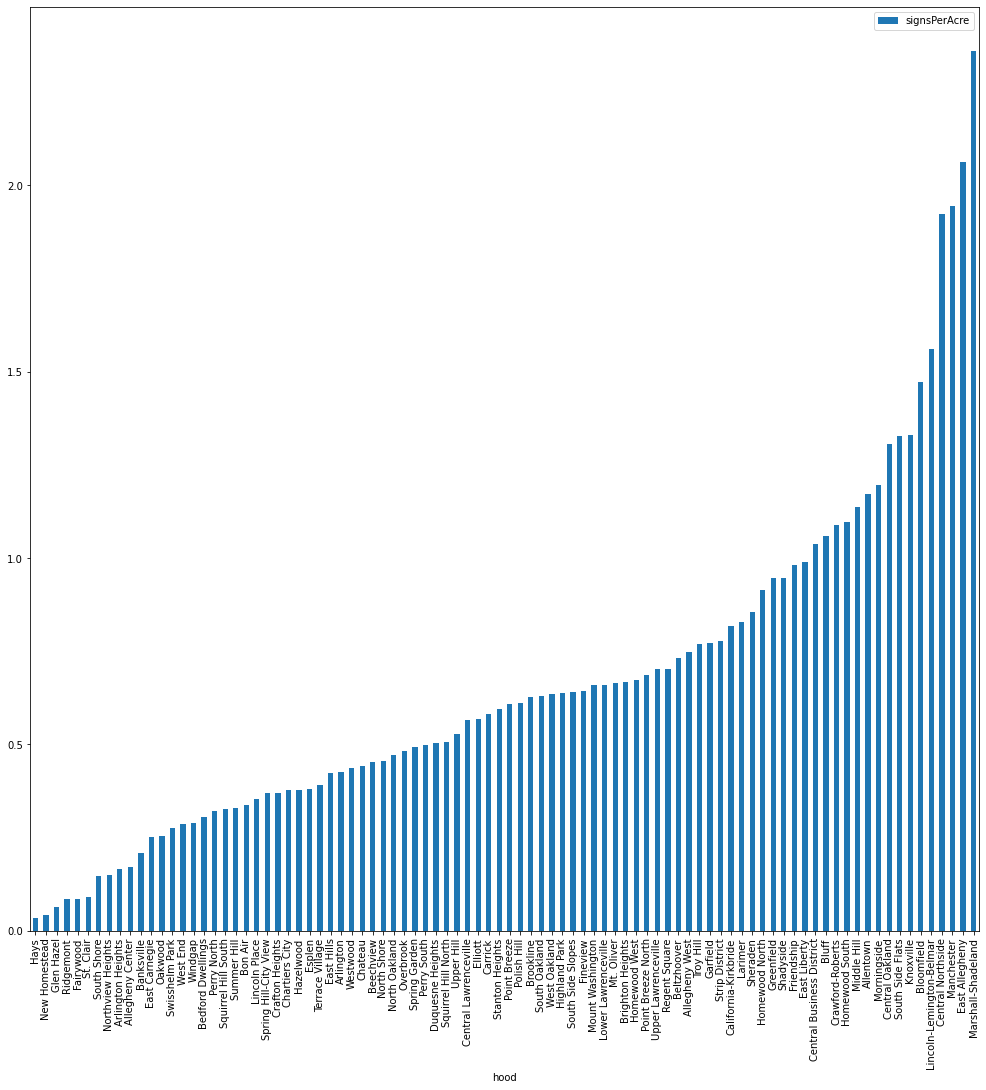

In [13]:
graphable.plot(x ='hood', y='signsPerAcre', kind = 'bar', figsize=(17, 17))

Another way that we thought would be a good way to depict the data would be with a heat map. I achieved this by looking back in our notes and remembering what we were taught regarding geopands.

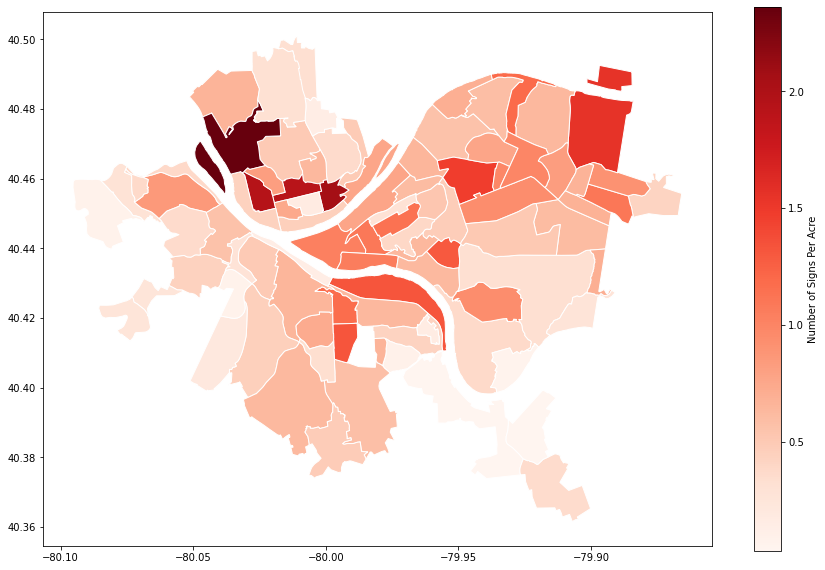

In [20]:
neighborhoods = geopandas.read_file("Neighborhood/Neighborhoods_.shp") # read in the shapefile
sign_map = neighborhoods.merge(graphable, how='left', left_on='hood', right_on='hood')
sign_map.plot(column='signsPerAcre', # set the data to be used for coloring
               cmap='Reds',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Signs Per Acre"}, # label the legend
               figsize=(15, 10),         # set the size
              # missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


---
In conculusion Marshal-Shadeland is the best neighborhood because of the 2.361530 ratio of signs to acres. This high ratio means that the pedestrians that would be walking around trying to catch pokemon would be safer becuase the cars would be more cautious and slow becuase of the signs.

---

Finally once I had my data I had to make it so it was easily comparable with the other datasets. To achieve this I divided by the highest value and multiplied by 100 to get a saftey percentage that I could compare across the city.

In [14]:
combiner= []
for value in graphable['signsPerAcre']:
    combiner.append((value/graphable.iloc[89,1])*100)

graphable["ScaledSignsPerAcre"] =combiner
graphableDropped = graphable.drop(columns=['signsPerAcre'])
graphableDropped = graphableDropped.sort_values(by=["hood"])
graphableDropped

,hood,ScaledSignsPerAcre
0,Allegheny Center,7.230313
1,Allegheny West,31.698122
2,Allentown,49.579581
3,Arlington,18.068802
4,Arlington Heights,7.008180
...,...,...
85,Upper Lawrenceville,29.764714
86,West End,12.175886
87,West Oakland,26.930287
88,Westwood,18.460330
